# **Taller 3**

Carolina Rincon Paez

Johann Efren Baron

Juan Jose Vargas

In [ ]:
!pip install --quiet yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import scipy.stats
from scipy.stats import norm
import warnings
import statsmodels.api as sm
import pylab as py
warnings.filterwarnings("ignore")

1. Escoja una acción de su preferencia. Con la información histórica para el periodo Ene-
2016 a Dic-2021, estime los parámetros μ y σ.

a. Con estos parámetros construya 10.000 trayectorias del precio que sigan el proceso
estocástico:

St = St−1 exp{(μ– 1/2σ
2
)dt + σ dWt
}

Donde: Wt es un proceso estándar de Wiener. Presente gráficamente las primeras 20
trayectorias del proceso para un tiempo de un año (T=1).

In [ ]:
start1 = '2015-12-31'
end1 = '2021-12-31'
acc1 = ['MSFT']
precios1 = yf.download(acc1, start = start1, end = end1, interval='1Mo')['Adj Close'].dropna()
retornos1 = np.log(precios1/precios1.shift(1)).dropna()
mu1 = retornos1.mean()
var1 = np.var(retornos1)
sigma1 = np.sqrt(var1)

[*********************100%***********************]  1 of 1 completed


In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    St = S # {"S":S} 
    return St

In [ ]:
T = 1
sigma = sigma1
mu = mu1
S0 = precios1.iloc[-1]
NS = 10000
M = 252
St = PathsGBM(S0,mu,sigma,T,NS,M)

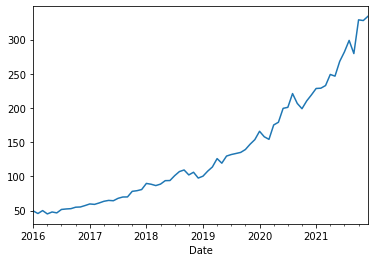

In [ ]:
precios1.plot()

b. Presente los histogramas de los precios y retornos al final del periodo (T=1).

Text(0, 0.5, 'S(t)')

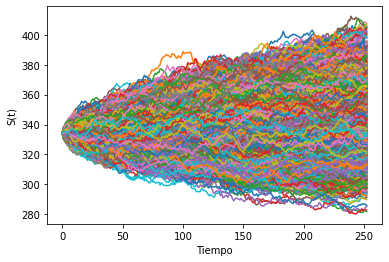

In [ ]:
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")
plt.ylabel("S(t)")

c. Demuestre que el valor terminal del precio simulado de la acción converge a
ST exp{(μ– 1/2σ
2
)}.

In [ ]:
St[:,252].mean()

343.1398922657035

In [ ]:
S0 * np.exp(mu * T)

343.2426940088828

d. Calcule la probabilidad de que los retornos de la acción sean inferiores a cero.

In [ ]:
retornos1 = np.log(precios1/precios1.shift()).dropna()
retornod = pd.DataFrame(retornos1)
S01 = retornod.iloc[-1]
prob = S01 < 0
prob.value_counts()/NS

False    0.0001
Name: 2021-12-01 00:00:00, dtype: float64

2. Con las acciones de: JPM, MCD, META, WMT

a. Construir el portafolio de mínima varianza global de Markowitz. Presentar el grafico de
pesos y sus medidas de retorno esperado y volatilidad

In [ ]:
start2 = '2010-12-31'
end2 = '2021-12-31'
acc2 = ['JPM','MCD','META','WMT']
precios2 = yf.download(acc2, start = start2, end = end2, interval='1Mo')['Adj Close'].dropna()
retornos2 = np.log(precios2/precios2.shift(1)).dropna()
mu2 = retornos2.mean()
cov2 = retornos2.cov()
var2 = np.diag(cov2)
sigma = np.sqrt(var2)
n = 4

[*********************100%***********************]  4 of 4 completed


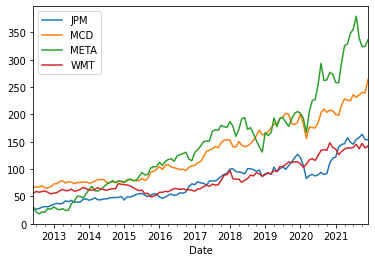

In [ ]:
precios2.plot()

In [ ]:
def pmvg(cov, ones):  
    cov_inv = np.linalg.inv(cov)
    w = np.dot(cov_inv, ones)
    return w / np.sum(w) 

In [ ]:
unos = np.repeat(1,n)
wpmvg = pmvg(cov2, unos)

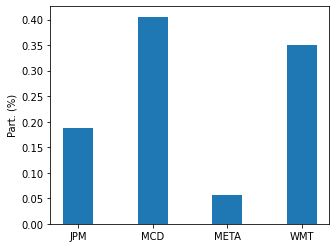

In [ ]:
fig = plt.figure(figsize = (5, 4))
plt.bar(acc2, wpmvg, width = 0.4)
plt.ylabel("Part. (%)")
plt.show()

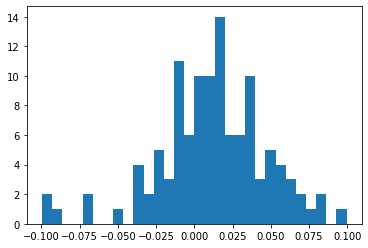

In [ ]:
retornos2 = retornos2 @ wpmvg 
plt.hist(retornos2,bins=30)
plt.show()

b. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo
estándar o paramétrico

99%

In [ ]:
rp = retornos2.mean()
sigmap = retornos2.std()

In [ ]:
alpha = 0.01
VaRp = rp - norm.ppf(1-alpha)*sigmap
VaRp2 = VaRp*np.sqrt(10)
VaRp2

JPM    -0.420761
MCD    -0.286491
META   -0.646675
WMT    -0.337112
dtype: float64

95%

In [ ]:
alpha = 0.05
VaRp = rp - norm.ppf(1-alpha)*sigmap
VaRp2 = VaRp*np.sqrt(10)
VaRp2

JPM    -0.283273
MCD    -0.191378
META   -0.437886
WMT    -0.230690
dtype: float64

c. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo
de estimación histórica

99%

In [ ]:
VaRH = np.percentile(retornos2,1)
VaRH

-0.1482237903915518

95%

In [ ]:
VaRH = np.percentile(retornos2,5)
VaRH

-0.08637135980093934

d. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo
de simulación

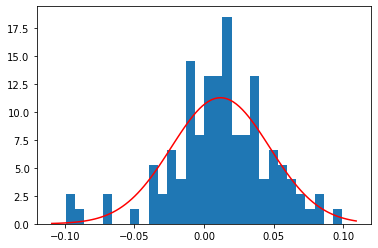

In [ ]:
rp = retornos2.mean()
sigmap = retornos2.std()
rp, sigmap
plt.hist(retornos2,bins=30,density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
px = norm.pdf(x,rp,sigmap)
plt.plot(x,px,'r')

3. Con la información de los registros de pérdidas de la entidad TuDeuda Ltda:

a. Realizar un análisis exploratorio de los datos (media, desviación, curtosis, simetría).
Apoye su análisis con gráficos (histogramas y QQplot).

In [ ]:
Data3 = pd.DataFrame(pd.read_excel("DataLoss.xlsx", parse_dates = ['Date']))
Datosq = Data3.loc[:,"Loss"]
Data3

,Date,Loss
0,2001-01-01,18986
1,2001-02-01,7312
2,2001-03-01,581
3,2001-04-01,4995
4,2001-05-01,10808
...,...,...
247,2021-08-01,9853
248,2021-09-01,6394
249,2021-10-01,18765
250,2021-11-01,2816


In [ ]:
media3 = Data3.mean()
media3

Loss    9983.123016
dtype: float64

In [ ]:
desvest3 = Data3.std()
desvest3

Date    2218 days 14:41:50.841086496
Loss                     5591.237909
dtype: object

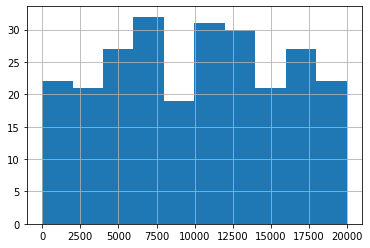

In [ ]:
Data3.loc[:,"Loss"].hist()

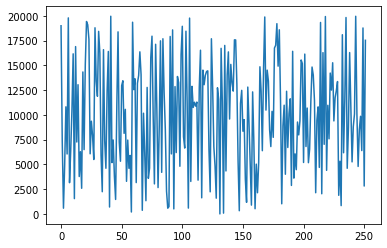

In [ ]:
Datosq.plot()

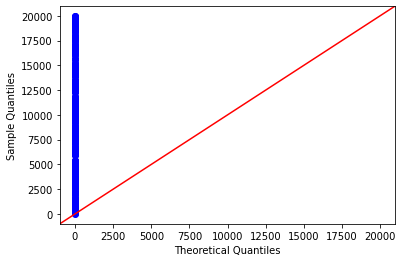

In [ ]:
sm.qqplot(Datosq, line ='45')
py.show()

b. ¿Qué puede decir de la distribución de los datos de pérdidas de la entidad?

In [ ]:
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
fa = Fitter(Datosq, distributions= get_common_distributions())
fa.fit()

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.79it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,1.041032e-07,1984.136725,-5433.983819,inf,0.040650,0.783563
powerlaw,1.042813e-07,1986.631183,-5428.023707,inf,0.045614,0.653649
rayleigh,1.240635e-07,2014.631369,-5389.780341,inf,0.083929,0.054174
norm,1.255499e-07,2019.622890,-5386.779128,inf,0.068681,0.177082
gamma,1.255533e-07,2021.622999,-5381.242834,inf,0.068493,0.179411


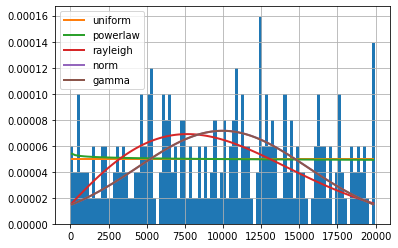

In [ ]:
fa.summary()

In [ ]:
fa.get_best(method = 'sumsquare_error')

{'uniform': {'loc': 4.0, 'scale': 19944.0}}

c. Ajuste diferentes funciones de distribución de probabilidad a los datos. ¿Qué distribución
recomienda?

In [ ]:
faa = Fitter(Datosq, distributions= ['gamma', 'uniform', 'norm','lognorm'])
faa.fit()

Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00,  7.62it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,1.041032e-07,1984.136725,-5433.983819,inf,0.040650,7.835629e-01
norm,1.255499e-07,2019.622890,-5386.779128,inf,0.068681,1.770824e-01
gamma,1.255533e-07,2021.622999,-5381.242834,inf,0.068493,1.794109e-01
lognorm,4.719242e-07,2566.998308,-5047.572611,inf,0.839383,1.323900e-199


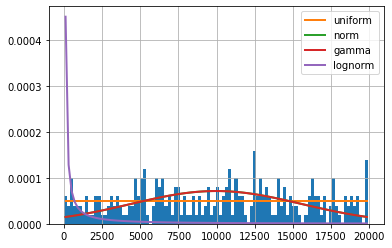

In [ ]:
faa.summary()

4. Escoja dos activos que presenten un comportamiento de reversión a la media tipo OU.

a. Construya la gráfica de las series históricas de los precios y/o valores

In [ ]:
!pip install --quiet yfinance
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


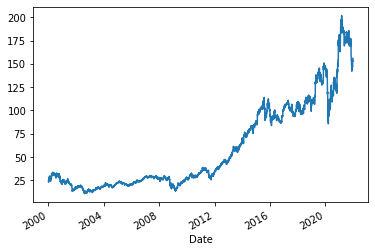

In [ ]:
acc4D = ["DIS"]
precios4 = yf.download(acc4,start="2000-01-01",end="2021-12-31")
DIS = precios4.loc[:,"Adj Close"]
DIS.plot()

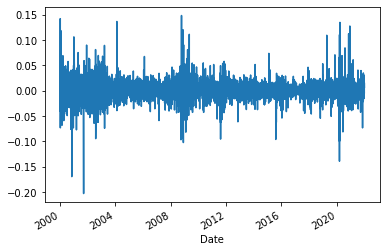

In [ ]:
retornosD = np.log(DIS/DIS.shift(1)).dropna()
retornosD.plot()

[*********************100%***********************]  1 of 1 completed


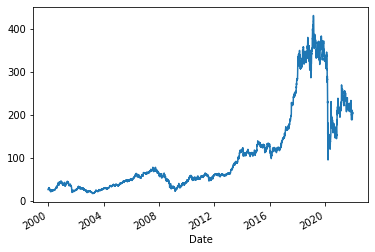

In [ ]:
acc4B = ["BA"]
precios4 = yf.download(acc4B,start="2000-01-01",end="2021-12-31")
BA = precios4.loc[:,"Adj Close"]
BA.plot()

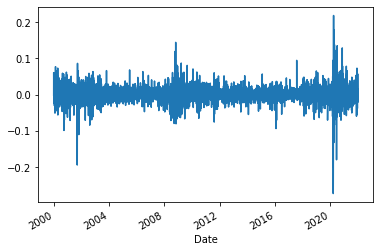

In [ ]:
retornos = np.log(BA/BA.shift(1)).dropna()
retornos.plot()

b. Presente los resultados de las pruebas de estacionariedad de Dickey-Fuller (ADF)

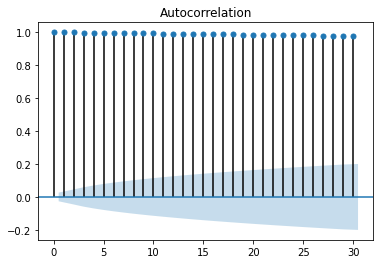

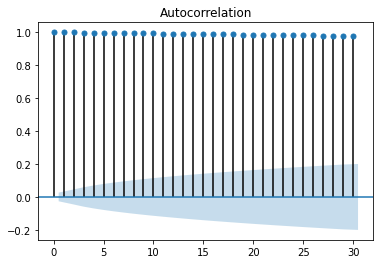

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(DIS, lags=30)

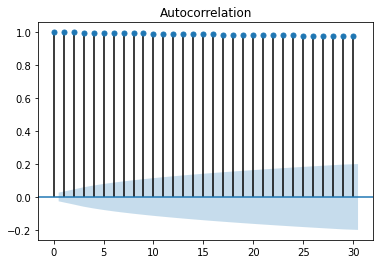

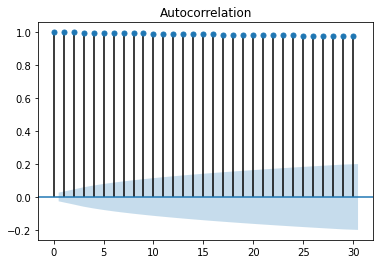

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(BA, lags=30)

Test Dickey-Fuller

In [ ]:
from statsmodels.tsa.stattools import adfuller 
pruebadf1 = adfuller(DIS)  
pruebadf1

(0.1596162980637055,
 0.9699034370000512,
 33,
 5501,
 {'1%': -3.431539302684988,
  '5%': -2.86206555371776,
  '10%': -2.567049751069702},
 17875.374583997684)

In [ ]:
from statsmodels.tsa.stattools import adfuller 
pruebadf1 = adfuller(BA)  
pruebadf1

(-1.2253003303780814,
 0.6626185714620205,
 32,
 5502,
 {'1%': -3.431539086425765,
  '5%': -2.8620654581717604,
  '10%': -2.567049700207492},
 28284.79661877481)

In [ ]:
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -1.225300
P-value: 0.662619
Citical values:
	1%: -3.431539
	5%: -2.862065
	10%: -2.567050


In [ ]:
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

c. Construya 100 trayectorias o simulaciones para cada activo con periodicidad mensual y
con duración T=1.

In [77]:
start1 = '2015-12-31'
end1 = '2021-12-31'
acc1 = ['DIS']
precios11 = yf.download(acc1, start = start1, end = end1, interval='1Mo')['Adj Close'].dropna()
retornos1 = np.log(precios1/precios1.shift(1)).dropna()
mu1 = retornos1.mean()
var1 = np.var(retornos1)
sigma1 = np.sqrt(var1)

[*********************100%***********************]  1 of 1 completed


In [78]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    St = S # {"S":S} 
    return St

In [79]:
T = 1
sigma = sigma1
mu = mu1
S0 = precios1.iloc[-1]
NS = 100
M = 12
St = PathsGBM(S0,mu,sigma,T,NS,M)

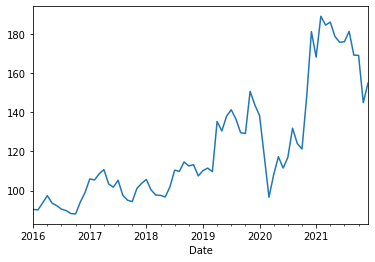

In [80]:
precios11.plot()

In [81]:
start1 = '2015-12-31'
end1 = '2021-12-31'
acc1 = ['BA']
precios111 = yf.download(acc1, start = start1, end = end1, interval='1Mo')['Adj Close'].dropna()
retornos1 = np.log(precios1/precios1.shift(1)).dropna()
mu1 = retornos1.mean()
var1 = np.var(retornos1)
sigma1 = np.sqrt(var1)

[*********************100%***********************]  1 of 1 completed


In [82]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    St = S # {"S":S} 
    return St

In [83]:
T = 1
sigma = sigma1
mu = mu1
S0 = precios111.iloc[-1]
NS = 100
M = 12
St = PathsGBM(S0,mu,sigma,T,NS,M)